# NLP Chatbot

## Domain:
Industrial safety. NLP based Chatbot.

## Context:
The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the
globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

## Data Description:
This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an
occurrence of an accident.
Columns description:
‣ Data: timestamp or time/date information
‣ Countries: which country the accident occurred (anonymised)
‣ Local: the city where the manufacturing plant is located (anonymised)
‣ Industry sector: which sector the plant belongs to
‣ Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
‣ Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors
involved in the accident)
‣ Genre: if the person is male of female
‣ Employee or Third Party: if the injured person is an employee or a third party
‣ Critical Risk: some description of the risk involved in the accident
‣ Description: Detailed description of how the accident happened.
Link to download the dataset: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database [ for your reference only ]

## Project Objective:
Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description.

# Industrial safety. NLP based Chatbot.

## PROJECT TASK:

## Milestone 1:

### Input: Interim report

### Process:

### Step 1: Import the data

In [980]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [981]:
import numpy as np
import re
import string
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import tokenize,stem
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from tqdm import tqdm
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from keras.utils import np_utils
from keras.layers import Input
from keras.layers.merge import Concatenate
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from keras.models import Model
from tensorflow.keras.layers import Flatten, Activation, Dense, LSTM, BatchNormalization, Embedding, Dropout, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Data** **Import**

In [982]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [983]:
data_URL = '/content/drive/MyDrive/archive (1)/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv'

In [984]:
df = pd.read_csv(data_URL)

In [985]:
df.head(5)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


### Step 2: Data cleansing

In [986]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.rename(columns={'Data':'Date', 'Genre':'Gender'}, inplace=True)
df.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [987]:
df.shape

(425, 10)

In [988]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      425 non-null    object
 1   Countries                 425 non-null    object
 2   Local                     425 non-null    object
 3   Industry Sector           425 non-null    object
 4   Accident Level            425 non-null    object
 5   Potential Accident Level  425 non-null    object
 6   Gender                    425 non-null    object
 7   Employee or Third Party   425 non-null    object
 8   Critical Risk             425 non-null    object
 9   Description               425 non-null    object
dtypes: object(10)
memory usage: 33.3+ KB


In [989]:
df['Date'].value_counts()

2017-02-08 00:00:00    6
2016-06-16 00:00:00    5
2016-10-03 00:00:00    4
2017-06-11 00:00:00    4
2016-06-08 00:00:00    4
                      ..
2016-07-18 00:00:00    1
2016-07-20 00:00:00    1
2016-07-21 00:00:00    1
2016-07-23 00:00:00    1
2017-07-09 00:00:00    1
Name: Date, Length: 287, dtype: int64

In [990]:
df['Countries'].value_counts()

Country_01    251
Country_02    130
Country_03     44
Name: Countries, dtype: int64

In [991]:
df['Local'].value_counts()

Local_03    90
Local_05    59
Local_01    57
Local_04    56
Local_06    46
Local_10    44
Local_08    27
Local_02    24
Local_07    14
Local_12     4
Local_09     2
Local_11     2
Name: Local, dtype: int64

In [992]:
df['Industry Sector'].value_counts()

Mining    241
Metals    134
Others     50
Name: Industry Sector, dtype: int64

In [993]:
df['Accident Level'].value_counts()

I      316
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64

In [994]:
df['Potential Accident Level'].value_counts()

IV     143
III    106
II      95
I       49
V       31
VI       1
Name: Potential Accident Level, dtype: int64

In [995]:
df['Gender'].value_counts()

Male      403
Female     22
Name: Gender, dtype: int64

In [996]:
df['Employee or Third Party'].value_counts()

Third Party             189
Employee                179
Third Party (Remote)     57
Name: Employee or Third Party, dtype: int64

In [997]:
df['Critical Risk'].value_counts()

Others                                       232
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Venomous Animals                              16
Cut                                           14
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Fall prevention (same level)                   7
remains of choco                               7
Pressurized Systems                            7
Fall prevention                                6
Suspended Loads                                6
Blocking and isolation of energies             3
Pressurized Systems / Chemical Substances      3
Power lock                                     3
Liquid Metal                                   3
Projection of fragments                        2
Machine Protection  

In [998]:
from sklearn.preprocessing import LabelEncoder
local_replace = {'Local_01': 1, 'Local_02': 2, 'Local_03': 3, 'Local_04': 4, 'Local_05': 5, 'Local_06': 6, 'Local_07': 7, 'Local_08': 8, 'Local_09': 9, 'Local_10': 10, 'Local_11': 11, 'Local_12': 12}
df['Local'] = df['Local'].map(local_replace)
le = LabelEncoder()
df['Accident Level'] = le.fit_transform(df['Accident Level'])
df['Potential Accident Level'] = le.fit_transform(df['Potential Accident Level'])
del local_replace

In [999]:
df.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,1,Mining,0,3,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,2,Mining,0,3,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,3,Mining,0,2,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,4,Mining,3,3,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [1000]:
df.isnull().sum()

Date                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [1001]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].apply(lambda x : x.year)
df['Month'] = df['Date'].apply(lambda x : x.month)

df['Weekday'] = df['Date'].apply(lambda x : x.day_name())
df.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Year,Month,Weekday
0,2016-01-01,Country_01,1,Mining,0,3,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,Friday
1,2016-01-02,Country_02,2,Mining,0,3,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,Saturday
2,2016-01-06,Country_01,3,Mining,0,2,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,Wednesday
3,2016-01-08,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,Friday
4,2016-01-10,Country_01,4,Mining,3,3,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,Sunday


In [1002]:
Month = {
    
    1   :  'January',
    2   :  'February',
    3   :  'March',
    4   :  'April',
    5   :  'May',
    6   :  'June',
    7   :  'July',
    8   :  'August',
    9   :  'September',
    10  :  'October',
    11  :  'November',
    12  :  'December'
    
}

In [1003]:
df['Month'] = df['Month'].map(Month)

In [1004]:
df.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Year,Month,Weekday
0,2016-01-01,Country_01,1,Mining,0,3,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,January,Friday
1,2016-01-02,Country_02,2,Mining,0,3,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,January,Saturday
2,2016-01-06,Country_01,3,Mining,0,2,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,January,Wednesday
3,2016-01-08,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,January,Friday
4,2016-01-10,Country_01,4,Mining,3,3,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,January,Sunday


In [1005]:
df['Critical Risk']=df['Critical Risk'].replace('\nNot applicable','Not applicable')

**only one column has unclean data**

In [1006]:
df['Critical Risk'].value_counts()

Others                                       232
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Venomous Animals                              16
Cut                                           14
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Fall prevention (same level)                   7
remains of choco                               7
Pressurized Systems                            7
Fall prevention                                6
Suspended Loads                                6
Blocking and isolation of energies             3
Pressurized Systems / Chemical Substances      3
Power lock                                     3
Liquid Metal                                   3
Projection of fragments                        2
Machine Protection  

In [1007]:
columns = df[df.columns[~df.columns.isin(['Description', 'Unnamed: 0', 'Data'])]].columns.tolist()
for cols in columns:
    print(f'Unique values for {cols} is \n{df[cols].unique()}\n')

Unique values for Date is 
['2016-01-01T00:00:00.000000000' '2016-01-02T00:00:00.000000000'
 '2016-01-06T00:00:00.000000000' '2016-01-08T00:00:00.000000000'
 '2016-01-10T00:00:00.000000000' '2016-01-12T00:00:00.000000000'
 '2016-01-16T00:00:00.000000000' '2016-01-17T00:00:00.000000000'
 '2016-01-19T00:00:00.000000000' '2016-01-26T00:00:00.000000000'
 '2016-01-28T00:00:00.000000000' '2016-01-30T00:00:00.000000000'
 '2016-02-01T00:00:00.000000000' '2016-02-02T00:00:00.000000000'
 '2016-02-04T00:00:00.000000000' '2016-02-06T00:00:00.000000000'
 '2016-02-07T00:00:00.000000000' '2016-02-08T00:00:00.000000000'
 '2016-02-21T00:00:00.000000000' '2016-02-25T00:00:00.000000000'
 '2016-02-09T00:00:00.000000000' '2016-02-10T00:00:00.000000000'
 '2016-02-15T00:00:00.000000000' '2016-02-14T00:00:00.000000000'
 '2016-02-13T00:00:00.000000000' '2016-02-16T00:00:00.000000000'
 '2016-02-17T00:00:00.000000000' '2016-02-19T00:00:00.000000000'
 '2016-02-20T00:00:00.000000000' '2016-02-18T00:00:00.000000000

In [1008]:
df.sample(5)

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Year,Month,Weekday
25,2016-02-15,Country_01,6,Metals,0,1,Male,Employee,Manual Tools,The operator was willing to manually displace ...,2016,February,Monday
163,2016-07-04,Country_01,6,Metals,2,3,Male,Third Party,Pressed,"At 11:00 a.m., Mr. Frank with the support of a...",2016,July,Monday
61,2016-03-18,Country_01,4,Mining,3,3,Male,Third Party,Others,Approximately at 11:50 a.m. in circumstances t...,2016,March,Friday
75,2016-04-02,Country_01,1,Mining,0,2,Male,Employee,Others,Parking the equipment Dumper ° 18 in the maint...,2016,April,Saturday
186,2016-08-04,Country_02,8,Metals,0,1,Male,Employee,Cut,When removing the cap from the wear plate of t...,2016,August,Thursday


In [1009]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      425 non-null    datetime64[ns]
 1   Countries                 425 non-null    object        
 2   Local                     425 non-null    int64         
 3   Industry Sector           425 non-null    object        
 4   Accident Level            425 non-null    int64         
 5   Potential Accident Level  425 non-null    int64         
 6   Gender                    425 non-null    object        
 7   Employee or Third Party   425 non-null    object        
 8   Critical Risk             425 non-null    object        
 9   Description               425 non-null    object        
 10  Year                      425 non-null    int64         
 11  Month                     425 non-null    object        
 12  Weekday               

### Data Visualisation
### Univariate Analysis

#### Countries

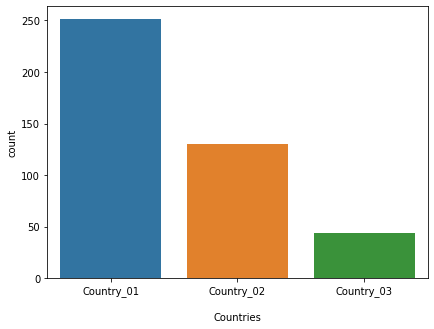

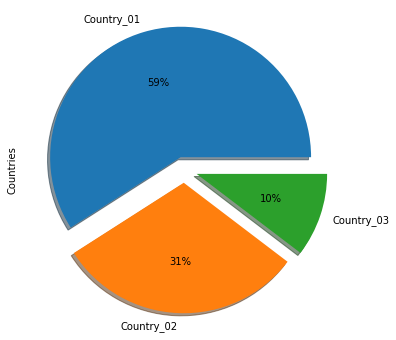

In [1010]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df['Countries']);
plt.xlabel("\nCountries")

plt.figure(figsize=(6,6))
df['Countries'].value_counts().plot.pie(shadow=True,autopct='%1.f%%', explode=(0.1,0.1,0.1))

**The most affected country from the above dataset is country_01 with around 59% of the accidents with the count of 250**

#### Local

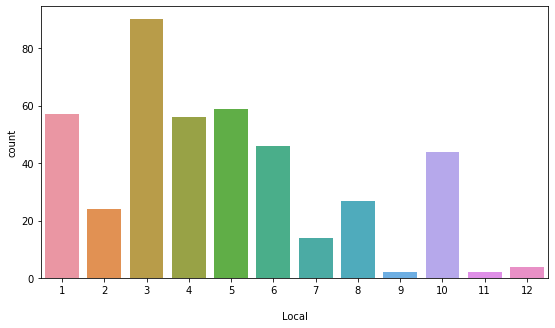

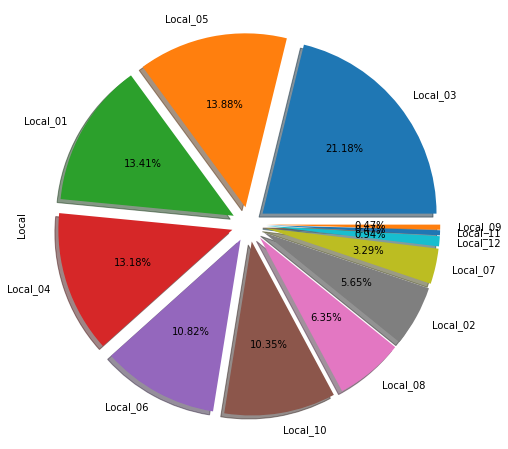

In [1011]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Local']);
plt.xlabel("\nLocal")



plt.figure(figsize=(8,8))
df['Local'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%', labels=['Local_03','Local_05','Local_01','Local_04','Local_06','Local_10',
                                                'Local_08','Local_02','Local_07','Local_12','Local_11','Local_09'],  explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1));

**Most accidents happened in Local_03 .Its count is 90 ,which is equivalent to 21.18%.**
**The second Most Accident happens in local_5 which is equivalent to 13.88%.**

#### Industry Sector

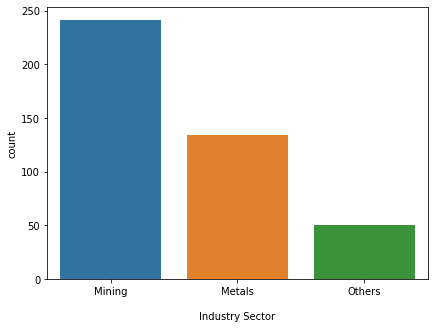

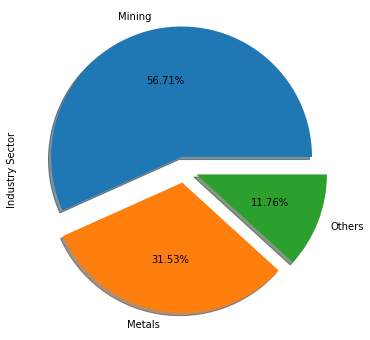

In [1012]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Industry Sector']);
plt.xlabel("\nIndustry Sector")



plt.figure(figsize=(6,6))
df['Industry Sector'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%',  explode=(0.1,0.1,0.1));

**Mostly affected sector is Mining sector. 56.71% of accidents occur in Mining sector.**

#### Gender

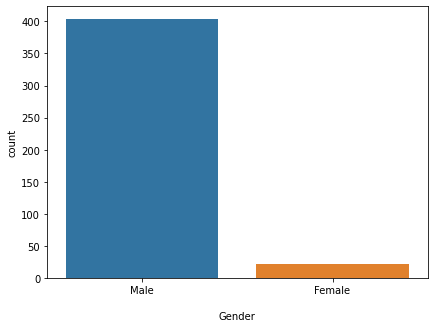

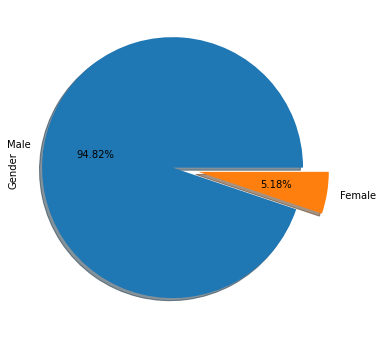

In [1013]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Gender']);
plt.xlabel("\nGender")



plt.figure(figsize=(6,6))
df['Gender'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%',  explode=(0.1,0.1));

**Most affected wokers in accidents are male .Their count is 403 ,which is equivalent to 94.82%**

#### Accident Level

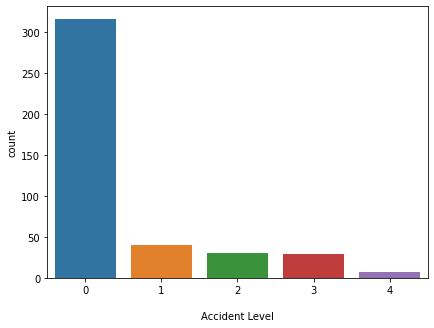

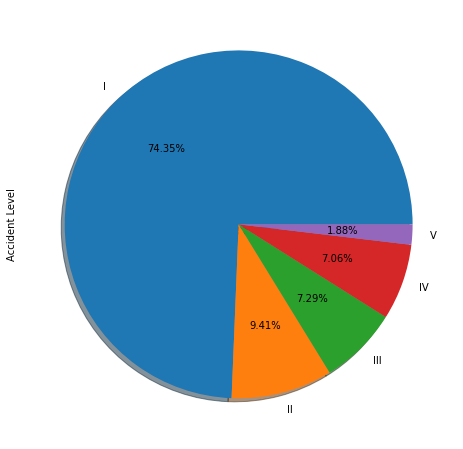

In [1014]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Accident Level']);
plt.xlabel("\nAccident Level")



plt.figure(figsize=(8,8))
df['Accident Level'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%',labels=['I', 'II', 'III' ,'IV' ,'V']);

**Most accidents belongs to "Accident Level - I" .Its count is 316 which is equivalent to 74.35%% of total accidents.**

#### Potential Accident Level

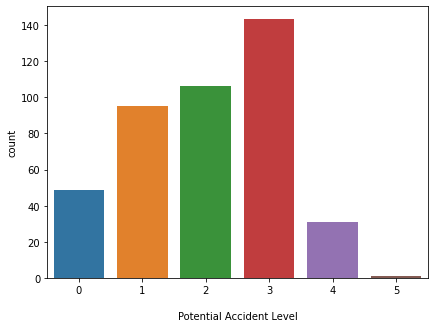

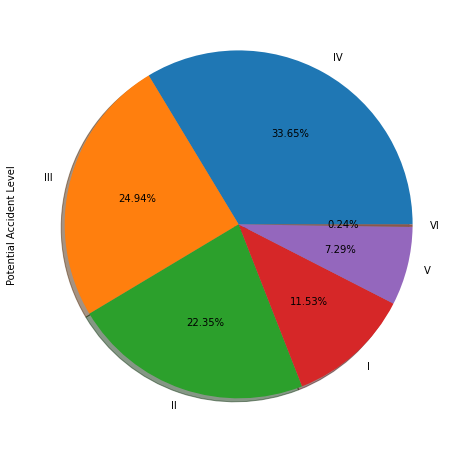

In [1015]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Potential Accident Level']);
plt.xlabel("\nPotential Accident Level")



plt.figure(figsize=(8,8))
df['Potential Accident Level'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%',labels=['IV','III','II','I','V','VI']);

**Most "Potential Accident Level" belongs to level IV .Its count is 143 which is equivalent to 33.65% of total potential accidents.**

#### Employee or Third Party

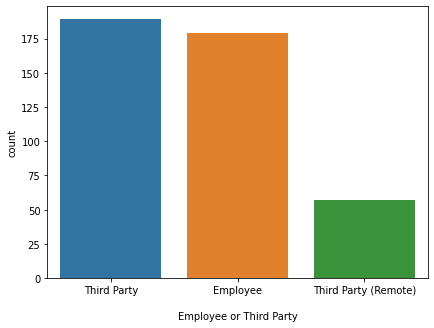

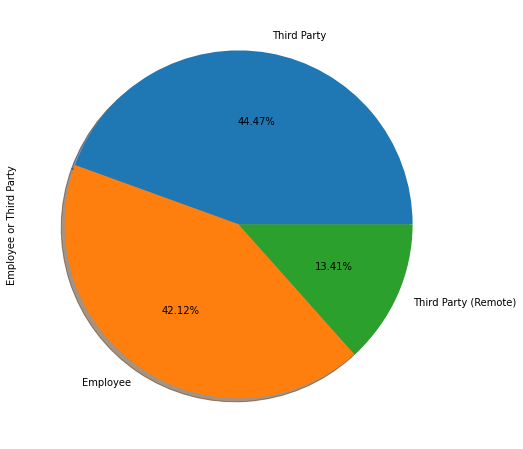

In [1016]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Employee or Third Party']);
plt.xlabel("\nEmployee or Third Party")



plt.figure(figsize=(8,8))
df['Employee or Third Party'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%');

**Most affected Employee type are Third party workers .Their count is 189 ,which is equivalent to 44.47%.**

### Bivariate Analysis

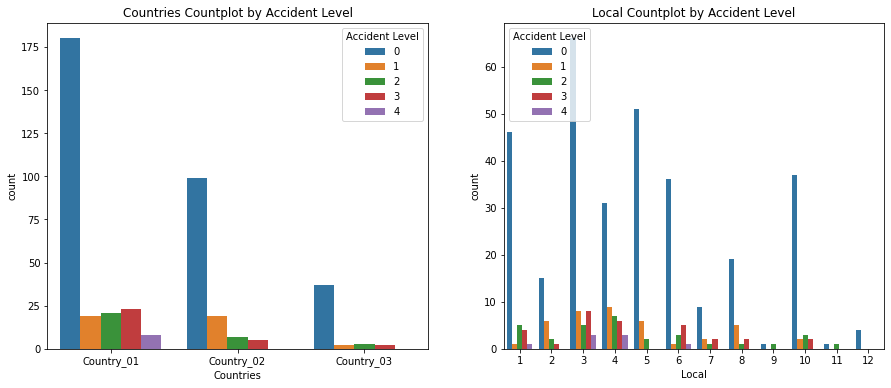

In [1017]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Countries Countplot by Accident Level')
sns.countplot(x='Countries',hue='Accident Level' , data=df );
plt.subplot(1,2,2)
plt.title('Local Countplot by Accident Level')
sns.countplot(x='Local',hue='Accident Level' , data=df);

plt.show()

### Country Vs Accident Level
- Accident level I is highest in all countries.                   
- Most accidents happened in Country_01.
- Accident level in Country_03 is lesser than other countries.

### Local Vs Accident Level
- Accident level I is highest in almost all localities.
- Accident level I is highest in Local 3.
- Local 9,11 and 12 have less accidents level.

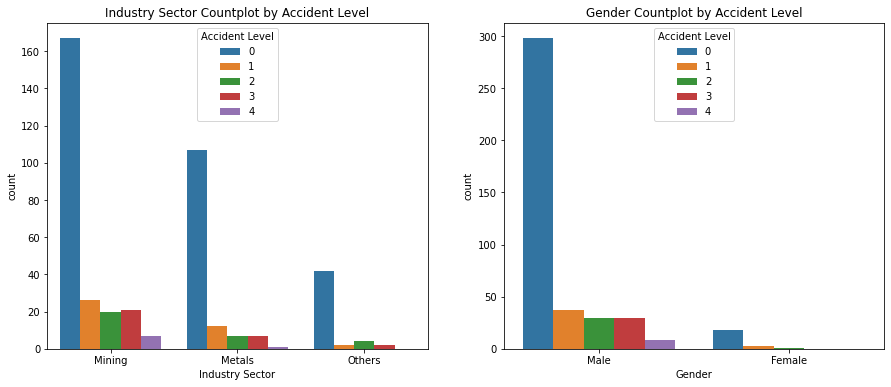

In [1018]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Industry Sector Countplot by Accident Level')
sns.countplot(x='Industry Sector',hue='Accident Level' , data=df );
plt.subplot(1,2,2)
plt.title('Gender Countplot by Accident Level')
sns.countplot(x='Gender',hue='Accident Level' , data=df);

plt.show()

### Industry Sector Vs Accident Level
- Accident level I is highest in all industry sector (Mining, Metals and Other).
- Most accidents happened in Mining industry sector.
- After Accident Level I ,Level II is Highest among al the Industries.
- There are very few cases for Accident level 5.

### Gender Vs Accident Level
- Accident level I is highest among the Gender.
- Most accidents happened with male ones.
- There are very few cases With Females.


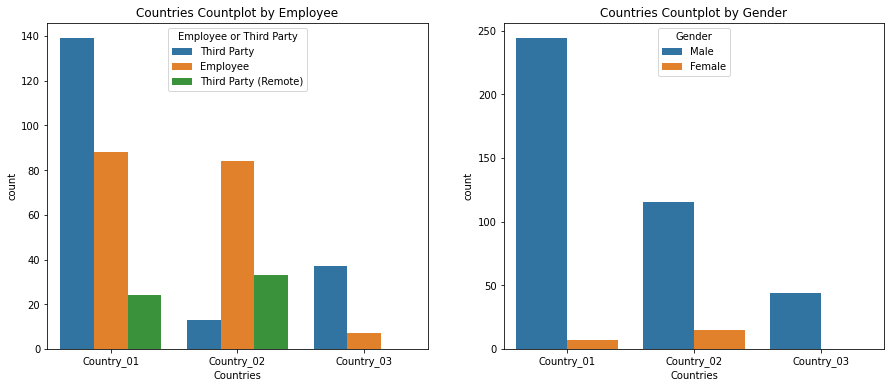

In [1019]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Countries Countplot by Employee')
sns.countplot(x="Countries", data=df, hue="Employee or Third Party");
plt.subplot(1,2,2)
plt.title('Countries Countplot by Gender')
sns.countplot(x="Countries", data=df, hue="Gender");

### Country vs Employee
- Country_01 is highest No. of injuries
- Most accidents happened with Third Party .
- In Country_02 the most effected ones are Employee
- Country_03 has Less injuries as compared to other Countries

### Country Vs Gender
- Country_01 is highest No. of injuries
- Most accidents happened with Males.
- In all Countries the males are Getting effected more .
- Country_03 has not even single Females 

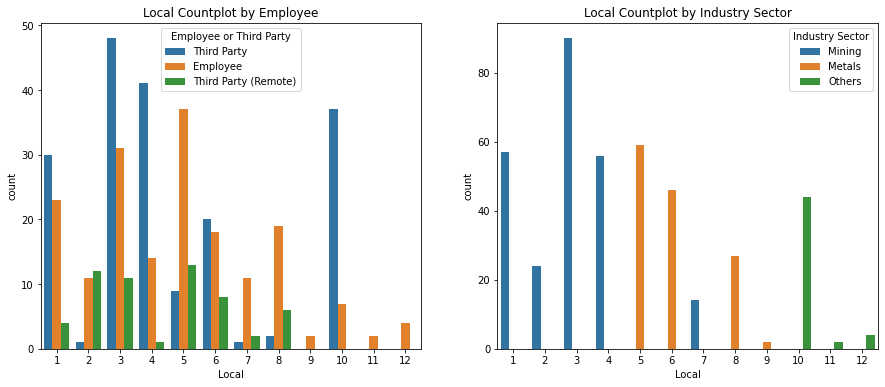

In [1020]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Local Countplot by Employee')
sns.countplot(x="Local", data=df, hue="Employee or Third Party");
plt.subplot(1,2,2)
plt.title('Local Countplot by Industry Sector')
sns.countplot(x="Local", data=df, hue="Industry Sector");

### Local Vs Employees 

- Local 3 has highest no of Third Party employees
- Local 3 has more employees than other localities.
- Local 10,11 don't have Third Party (Remote) employees.
- Local 8,10,11 don't have Employee and Third Party employees.

### Local Vs Industry Sector 

- Local 3 has highest number of Mining industry sector.
- Local 5 has highest number of Metals industry sector.
- Local 1,2,3,4,7 has Mining industry sector.
- Local 5,6,7,8 has Metals industry sector.
- Local 10,11,12 has Others industry sector.

### Step 3: Data preprocessing

In [1021]:
#library that contains punctuation
#import string
#string.punctuation

In [1022]:
#defining the function to remove punctuation
#def remove_punctuation(text):
    #punctuationfree="".join([i for i in text if i not in string.punctuation])
    #return punctuationfree


In [1023]:
#df['Processed_Description']= remove_punctuation(df['Description'])

In [1024]:
df.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Year,Month,Weekday
0,2016-01-01,Country_01,1,Mining,0,3,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,January,Friday
1,2016-01-02,Country_02,2,Mining,0,3,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,January,Saturday
2,2016-01-06,Country_01,3,Mining,0,2,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,January,Wednesday
3,2016-01-08,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,January,Friday
4,2016-01-10,Country_01,4,Mining,3,3,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,January,Sunday


#### Lower Case

In [1025]:
df['Processed_Description'] = df['Description'].str.lower()

In [1026]:
df['Processed_Description']

0      while removing the drill rod of the jumbo 08 f...
1      during the activation of a sodium sulphide pum...
2      in the sub-station milpo located at level +170...
3      being 9:45 am. approximately in the nv. 1880 c...
4      approximately at 11:45 a.m. in circumstances t...
                             ...                        
420    being approximately 5:00 a.m. approximately, w...
421    the collaborator moved from the infrastructure...
422    during the environmental monitoring activity i...
423    the employee performed the activity of strippi...
424    at 10:00 a.m., when the assistant cleaned the ...
Name: Processed_Description, Length: 425, dtype: object

 #### Expand Contractions

In [1027]:
contractions_dict = {"ain't": "are not","'s":" is","aren't": "are not"}
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)
# Expanding Contractions in the reviews
df['Processed_Description']=df['Processed_Description'].apply(lambda x:expand_contractions(x))

In [1028]:
df['Processed_Description']

0      while removing the drill rod of the jumbo 08 f...
1      during the activation of a sodium sulphide pum...
2      in the sub-station milpo located at level +170...
3      being 9:45 am. approximately in the nv. 1880 c...
4      approximately at 11:45 a.m. in circumstances t...
                             ...                        
420    being approximately 5:00 a.m. approximately, w...
421    the collaborator moved from the infrastructure...
422    during the environmental monitoring activity i...
423    the employee performed the activity of strippi...
424    at 10:00 a.m., when the assistant cleaned the ...
Name: Processed_Description, Length: 425, dtype: object

#### Remove punctuations

In [1029]:
df['Processed_Description'] = df['Processed_Description'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

In [1030]:
df['Processed_Description']

0      while removing the drill rod of the jumbo 08 f...
1      during the activation of a sodium sulphide pum...
2      in the substation milpo located at level 170 w...
3      being 945 am approximately in the nv 1880 cx69...
4      approximately at 1145 am in circumstances that...
                             ...                        
420    being approximately 500 am approximately when ...
421    the collaborator moved from the infrastructure...
422    during the environmental monitoring activity i...
423    the employee performed the activity of strippi...
424    at 1000 am when the assistant cleaned the floo...
Name: Processed_Description, Length: 425, dtype: object

#### Remove Stopwords

In [1031]:
#remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('subject')
stop_words.add('http')
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
df['Processed_Description'] = df['Processed_Description'].apply(lambda x: remove_stopwords(x))

In [1032]:
df['Processed_Description']

0      removing drill rod jumbo 08 maintenance superv...
1      activation sodium sulphide pump piping uncoupl...
2      substation milpo located level 170 collaborato...
3      945 approximately nv 1880 cx695 ob7 personnel ...
4      approximately 1145 circumstances mechanics ant...
                             ...                        
420    approximately 500 approximately lifting kelly ...
421    collaborator moved infrastructure office julio...
422    environmental monitoring activity area employe...
423    employee performed activity stripping cathodes...
424    1000 assistant cleaned floor module e central ...
Name: Processed_Description, Length: 425, dtype: object

####  Lemmatization

In [1033]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [1034]:
#stemming
#from nltk.stem import PorterStemmer
#stemmer = PorterStemmer()
#def stem_words(text):
    #return " ".join([stemmer.stem(word) for word in text.split()])
#df['Processed_Description'] = df['Processed_Description'].apply(lambda x: stem_words(x))

In [1035]:
#df['Processed_Description']

In [1036]:
#lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
  return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
df['Processed_Description'] = df['Processed_Description'].apply(lambda text: lemmatize_words(text))

In [1037]:
df['Processed_Description']

0      removing drill rod jumbo 08 maintenance superv...
1      activation sodium sulphide pump piping uncoupl...
2      substation milpo located level 170 collaborato...
3      945 approximately nv 1880 cx695 ob7 personnel ...
4      approximately 1145 circumstance mechanic antho...
                             ...                        
420    approximately 500 approximately lifting kelly ...
421    collaborator moved infrastructure office julio...
422    environmental monitoring activity area employe...
423    employee performed activity stripping cathode ...
424    1000 assistant cleaned floor module e central ...
Name: Processed_Description, Length: 425, dtype: object

#### Remove Extra Spaces

In [1038]:
df['Processed_Description'] = df['Processed_Description'].apply(lambda text: re.sub(' +', ' ', text))

In [1039]:
df['Processed_Description']

0      removing drill rod jumbo 08 maintenance superv...
1      activation sodium sulphide pump piping uncoupl...
2      substation milpo located level 170 collaborato...
3      945 approximately nv 1880 cx695 ob7 personnel ...
4      approximately 1145 circumstance mechanic antho...
                             ...                        
420    approximately 500 approximately lifting kelly ...
421    collaborator moved infrastructure office julio...
422    environmental monitoring activity area employe...
423    employee performed activity stripping cathode ...
424    1000 assistant cleaned floor module e central ...
Name: Processed_Description, Length: 425, dtype: object

#### Tokenization and keeping alphabets

In [1040]:
#defining function for tokenization
stop=set(stopwords.words('english'))
import re
def tokenization(text):
  c=[]
  for desc in text:
    words=[w for w in word_tokenize(desc) if (w not in stop)]
    words = [word for word in words if word.isalpha()]
    c.append(words)
  return c 

In [1041]:
df['Processed_Description']= tokenization(df['Processed_Description'])

In [1042]:
df['Processed_Description']

0      [removing, drill, rod, jumbo, maintenance, sup...
1      [activation, sodium, sulphide, pump, piping, u...
2      [substation, milpo, located, level, collaborat...
3      [approximately, nv, personnel, begin, task, un...
4      [approximately, circumstance, mechanic, anthon...
                             ...                        
420    [approximately, approximately, lifting, kelly,...
421    [collaborator, moved, infrastructure, office, ...
422    [environmental, monitoring, activity, area, em...
423    [employee, performed, activity, stripping, cat...
424    [assistant, cleaned, floor, module, e, central...
Name: Processed_Description, Length: 425, dtype: object

In [1043]:
leng = []
for i in df['Processed_Description']:
  leng.append(len(i))
print('Maximum length of the sentence in processed description :',max(leng))

Maximum length of the sentence in processed description : 93


In [1044]:
desc_processed = []
for i in range(len(df['Processed_Description'])):
   desc_processed.append(' '.join(wrd for wrd in df.iloc[:,13][i]))

In [1045]:
df['description_processed'] = desc_processed

In [1046]:
df.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Year,Month,Weekday,Processed_Description,description_processed
0,2016-01-01,Country_01,1,Mining,0,3,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,January,Friday,"[removing, drill, rod, jumbo, maintenance, sup...",removing drill rod jumbo maintenance superviso...
1,2016-01-02,Country_02,2,Mining,0,3,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,January,Saturday,"[activation, sodium, sulphide, pump, piping, u...",activation sodium sulphide pump piping uncoupl...
2,2016-01-06,Country_01,3,Mining,0,2,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,January,Wednesday,"[substation, milpo, located, level, collaborat...",substation milpo located level collaborator ex...
3,2016-01-08,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,January,Friday,"[approximately, nv, personnel, begin, task, un...",approximately nv personnel begin task unlockin...
4,2016-01-10,Country_01,4,Mining,3,3,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,January,Sunday,"[approximately, circumstance, mechanic, anthon...",approximately circumstance mechanic anthony gr...


In [1047]:
#defining function for tokenization
#import re
#def tokenization(text):
    #tokens = re.split('W+',text)
   # return tokens


In [1048]:
#import nltk
#nltk.download('stopwords')

In [1049]:
#Stop words present in the library
#stopwords = nltk.corpus.stopwords.words('english')
#stopwords[0:10]
#['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [1050]:
#defining the function to remove stopwords from tokenized text
#def remove_stopwords(text):
    #output= [i for i in text if i not in stopwords]
    #return output

In [1051]:
#applying the function
#df['Processed_Description']= df['Description'].apply(lambda x:remove_stopwords(x))


In [1052]:
#importing the Stemming function from nltk library
#from nltk.stem.porter import PorterStemmer

In [1053]:
#defining the object for stemming
#porter_stemmer = PorterStemmer()

In [1054]:
#defining a function for stemming
#def stemming(text):
     #stem_text= [porter_stemmer.stem(word) for word in text]
     #return stem_text
     #df['Processed_Description']=df['Description'].apply(lambda x: stemming(x))


In [1055]:
#from nltk.stem import WordNetLemmatizer

In [1056]:
#defining the object for Lemmatization
#wordnet_lemmatizer = WordNetLemmatizer()

In [1057]:
#defining the function for lemmatization
#def lemmatizer(text):
    #lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    #return lemm_text
    #df['Processed_Description']=df['Description'].apply(lambda x:lemmatizer(x))

#### Word Cloud

In [1058]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

(-0.5, 399.5, 199.5, -0.5)

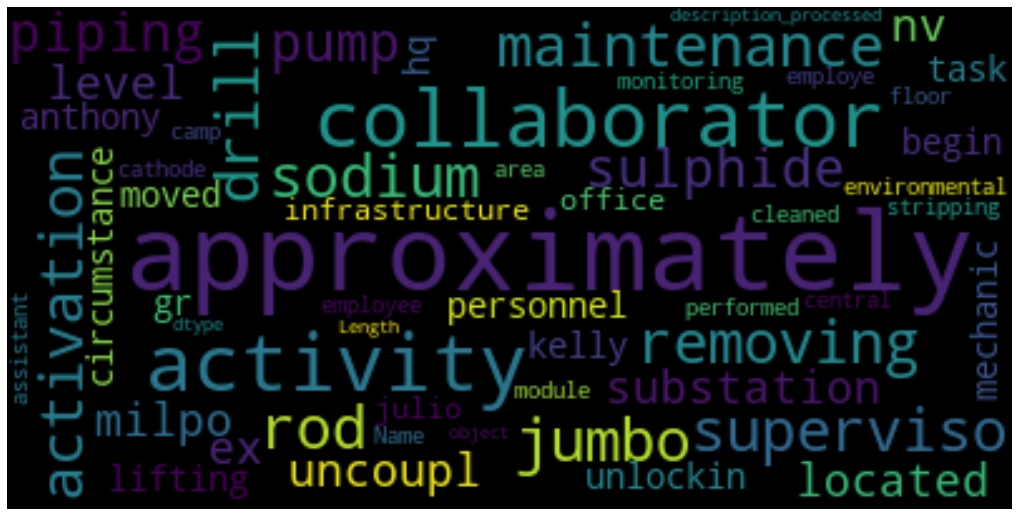

In [1059]:
stopwords = set(STOPWORDS)

# Generate a word cloud image
desc = df['description_processed']
wordcloud = WordCloud(stopwords = stopwords, background_color = "black").generate(str(desc))

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = [18, 18])
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")